# DMDS Project - Use data to maximize revenue from marketing campaigns 
31/01/2020
## Jiani


## What are the steps to take for this project?

1.Frame the problem: "Maximize revenue for 3 products" could be reframed as "calculate the probability of what the clients will buy", and "what revenue could they generate for each product".

2.This requires two different ML methods: classification and regression.


Step1: Prepare the data:

This step is for exploring the data 


## Which clients are to be targeted with which offer?

Three products to be identified: Customer Credit, Customer Loan, Customer Mutuel fund.
By testing Tree-based classification models (Decisiontreeclassifier, Logistic Regression, Naîve Bayers and random forests), we tend to maximize the accuracy results of each model adopted, and then based on the probability, map on the probability of each client (the intention to purchase this product), and then calculate the potential revenu (based on the revenu already generated before by these clients). 



## How to optimize the revenue based on the propensity mapped on each client? 

Based on the propensity (which client is more likely to purchase which product, and the potentiel revenue that could be trained on linear regression.


The data were split into 75% for training and 25% for testing purposes. The training dataset was further analyzed using 3-fold validation and the final results (presented below) were generated on the testing set.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

%matplotlib inline
from pandas import read_excel
df_soc = pd.read_excel('soc.xlsx')#Social-demographical data (client ID, age, gender, tenure in a bank)
df_product = pd.read_excel('products.xlsx')#Products and actual balance (current account, saving account, mutual funds, overdraft, credit card, consumer loan)
df_inoutflow = pd.read_excel('inoutflow.xlsx')#Inflow/outflow on C/A, aggregated card turnover (monthly average over past 3 months)
df_sales = pd.read_excel('sales.xlsx')#Clients actual sales and revenues. Data is available for 60 % of the clients.

In [3]:
#Training dataset for MF product 
df_train_whole=pd.merge(df_sales, df_inoutflow, on='Client', how='left')
df_train_whole=df_train_whole.drop(['Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'],axis=1)
df_train_MF=pd.merge(df_train_whole, df_soc, on='Client', how='left')
df_train_MF=pd.merge(df_train_MF, df_product, on='Client', how='left')
df_train_MF['Sex']=df_train_MF['Sex'].replace({'M':'0','F':'1'})
#df_train_MF = df_train_MF[['Sale_MF','Client','VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder','TransactionsDeb','TransactionsDeb_CA','TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','Age','Tenure']]
#df_train_MF=df_train_MF.dropna()
df_train_MF


,Client,Sale_MF,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,...,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,1094,0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,...,NaN,NaN,NaN,NaN,89.022500,NaN,NaN,NaN,NaN,NaN
1,1484,1,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,20,0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,...,NaN,NaN,NaN,NaN,2194.472143,18302.062500,NaN,NaN,NaN,NaN
3,1193,0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,...,NaN,1.0,NaN,NaN,4180.697500,NaN,NaN,0.0,NaN,NaN
4,142,0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1511.683929,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1316,0,2713.495000,2665.039286,4.0,2.0,2985.423571,2874.767857,400.000000,507.816429,...,NaN,1.0,1.0,NaN,2145.810000,5861.004643,NaN,0.0,43.321429,NaN
965,905,1,573.861071,573.861071,2.0,2.0,634.845357,634.845357,0.000000,0.000000,...,NaN,NaN,NaN,NaN,4899.048214,NaN,NaN,NaN,NaN,NaN
966,938,0,448.467143,448.465000,3.0,2.0,470.528571,470.528571,85.714286,221.528571,...,2.0,NaN,NaN,NaN,7.576786,52743.090714,0.0,NaN,NaN,NaN
967,434,0,173.211786,173.211786,3.0,3.0,174.010714,174.010714,71.428571,9.510714,...,NaN,NaN,NaN,NaN,2469.842857,NaN,NaN,NaN,NaN,NaN


## Correlation features

In [25]:
corr = df_train_MF.corr()
corr.sort_values(["Sale_MF"], ascending = False, inplace = True)
print(corr.Sale_MF)
#plt.figure(figsize=(50,50))
#sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='seismic')
#plt.title('Correlation between the selected Features')

Sale_MF                         1.000000
Count_MF                        0.289443
TransactionsDebCashless_Card    0.124722
TransactionsDeb                 0.082046
TransactionsCred_CA             0.081221
TransactionsCred                0.073665
TransactionsDeb_CA              0.053412
ActBal_CC                       0.044566
TransactionsDeb_PaymentOrder    0.022197
VolumeCred_CA                   0.015658
Client                          0.011927
ActBal_MF                       0.010592
ActBal_OVD                      0.005557
Count_CA                        0.003675
VolumeDebCashless_Card          0.001447
TransactionsDebCash_Card       -0.001596
VolumeCred                     -0.003366
Tenure                         -0.006277
VolumeDeb_PaymentOrder         -0.012854
Age                            -0.030449
VolumeDebCash_Card             -0.030535
VolumeDeb_CA                   -0.032684
VolumeDeb                      -0.036300
ActBal_CA                      -0.042985
Count_SA        

In [26]:
df_train_MF=df_train_MF.loc[:,['Sale_MF','Sex','ActBal_CC','Count_MF','TransactionsDebCashless_Card','TransactionsDeb','TransactionsCred_CA',
                               'TransactionsCred','TransactionsDeb_CA','ActBal_SA','Count_CL','ActBal_CL']]
df_train_MF=df_train_MF.replace({np.NaN:'0'})
df_train_MF

,Sale_MF,Sex,ActBal_CC,Count_MF,TransactionsDebCashless_Card,TransactionsDeb,TransactionsCred_CA,TransactionsCred,TransactionsDeb_CA,ActBal_SA,Count_CL,ActBal_CL
0,0,0,0,0,21,31,1,1,31,0,0,0
1,1,0,0,0,16,23,5,5,23,0,0,0
2,0,0,0,0,1,7,3,4,7,18302.1,0,0
3,0,0,0,0,21,55,21,23,36,0,0,0
4,0,1,0,0,0,2,1,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
964,0,1,43.3214,0,26,41,2,4,39,5861,0,0
965,1,0,0,0,0,2,2,2,2,0,0,0
966,0,0,0,2,9,17,2,3,17,52743.1,0,0
967,0,0,0,0,2,8,3,3,8,0,0,0


In [27]:
#Train-test-split
#y = target value ['Sale_MF'], X with all the features
SEED=123
Y=df_train_MF.iloc[:,0].values
X=df_train_MF.iloc[:,1:].values
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.25, random_state=SEED)

In [28]:
#Fit a dicision tree 
#Using gini criterion, could obtain an accuracy of 6.8% more 
# Initialize the model with max_depth set at 5
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
mytree = tree.DecisionTreeClassifier(ccp_alpha=0.1,max_depth=20)
mytree = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit the model on the training data
treemodel = mytree.fit(train_X, train_Y)

# Predict values on the testing data
pred_Y_test = treemodel.predict(test_X)
pred_Y_train = treemodel.predict(train_X)

# Measure model performance on testing data
y_pred=treemodel.predict(test_X)
accuracy_score(test_Y, y_pred)

0.7119341563786008

In [29]:
metrics.recall_score(test_Y,y_pred)

0.28

In [30]:
#Matching the probability of purchase of each client form df_MF's table by creating a new column 
def score(dataframe, Client, pscore):
    dataframe['Propensity'] = 0
    for i in range(len(dataframe)):
        idx=dataframe.index[i]
        for j in range(len(Client)):
            if dataframe.loc[idx,'Client']==Client[j]:
                dataframe.loc[idx,'Propensity']=pscore[j]
                                             

#Client=test_X[:,0]
#pscore=treemodel.predict_proba(test_X)[:,1]
#score(df_train_MF, Client, pscore)
#Client_Dtf=pd.DataFrame(Client) 
#pscore_Dtf=pd.DataFrame(pscore) 
#pscore_Dtf=pscore_Dtf.rename(columns={0:'Client'})
#Client_Dtf=Client_Dtf.rename(columns={0:'Client'})




## Ensemble Training for the second round



In [31]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.25)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=1)
knn = KNN()
dt = DecisionTreeClassifier(random_state=1)
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [32]:
for clf_name,clf in classifiers:
    clf.fit(train_X,train_Y)
    y_pred=clf.predict(test_X)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(test_Y, y_pred)))

Logistic Regression : 0.765
K Nearest Neighbours : 0.757
Classification Tree : 0.704


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=classifiers)
vc.fit(train_X, train_Y) 
y_pred = vc.predict(test_X)
accuracy_score(test_Y, y_pred)
accuracy_score
#metrics.precision_score(test_Y,y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

The accuracy from ensemble training obtained is 81.09 %, as we can see from the DecisionTree model, but after merging the revenue column with the potentiel MF product clients, there is clearly a mismatch. 
## So further correlation and investigation need to be conducted.

# Logistic Regression for MF products  


## 1. First Step: Explore the data - Study the correlation between attributes

## 2. Second step: Selecting only the features who have high correlation with Sales_MF

## 3. Third step: Train-Test-Split -> Fit the logistic model

In [34]:
#Train-test-split using logistic regression 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='none',C=3,class_weight='balanced')
logistic = logistic.fit(train_X, train_Y)
print("Accuracy = "+str(logistic.score(test_X, test_Y)))

Accuracy = 0.6131687242798354


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 4. Mesuring the performance of the model -> Confusion Matrix

In [35]:
# confusion matrix instead of MSE
#print the CV error, Train error, Test error
#print('CV MSE: {:.2f}'.format(mse_cv.mean()))
#print('Train MSE: {:.2f}'.format(MSE(train_Y, pred_Y_train)))
#print('Test MSE: {:.2f}'.format(MSE(test_Y, pred_Y_test)))
# Use score method to get accuracy of model
#score = logistic.score(test_X, test_Y)
#print(score)
y_pred=logistic.predict(test_X)
#metrics.precision_score(test_Y,y_pred)
metrics.precision_score(test_Y,y_pred)

0.28421052631578947

In [36]:
tab1=pd.DataFrame(df_sales['Revenue_MF'])
tab1

,Revenue_MF
0,0.000000
1,25.609107
2,0.000000
3,0.000000
4,0.000000
...,...
964,0.000000
965,1.761071
966,0.000000
967,0.000000


In [37]:
#df_train_MF=df_train_MF[(df_train_MF.Sale_MF !=0)]
#df_train_MF=df_train_MF[(df_train_MF.Propensity !=0)]
#tab=df_train_MF[['Sale_MF','Client','Propensity']]
#MF_Pred=pd.merge(tab,tab1, left_index=True, right_index=True,how='left')
#print('The expected revenue generated from all possible clients are {:.2f}'.format((MF_Pred['Revenue_MF'].sum())))

## The expected revenue generated from all possible clients for MF  product is 433.96


## Naive Bayes

In [38]:
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#y_pred = gnb.fit(train_X, train_Y).predict(test_X)
#prediction=cross_val_predict(gnb,train_X,train_Y)
#accuracy=accuracy_score(test_Y, y_pred)
#accuracy

## SVM

In [51]:
from sklearn import svm
from sklearn.model_selection import cross_val_predict
clff = svm.SVC(kernel='rbf', gamma=4)
#score=cross_val_score(clf,train_X, train_Y, cv=10)
y_pred=clff.fit(train_X, train_Y).predict(test_X)
accuracy=accuracy_score(test_Y, y_pred)
accuracy
#metrics.precision_score(test_Y,y_pred)

0.7860082304526749

In [50]:
scores = cross_val_score(clff, train_X, train_Y, cv=10)
#print ('Cross-validated scores:', scores)
predictions = cross_val_predict(clff, test_X,test_Y, cv=10)
accuracy = accuracy_score(test_Y, predictions)
accuracy

0.7695473251028807

## Tuning SVM Model

In [41]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, Y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(train_X, train_Y)
    grid_search.best_params_
    return grid_search.best_params_

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,
random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=1000,max_depth=10, random_state=0)
clf.fit(train_X,train_Y)
accuracy=accuracy_score(test_Y, y_pred)
accuracy

0.7901234567901234

# Explore the data

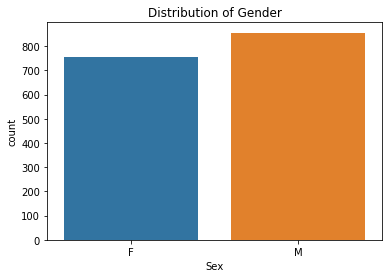

In [435]:
# countplot of distribution of Sex
# There are slightly more men than women in this data set.
df_soc['Sex'] = df_soc['Sex'].astype('category')
sns.countplot(x='Sex', data=df_soc);
plt.title('Distribution of Gender');

Text(0.5, 0, 'Age')

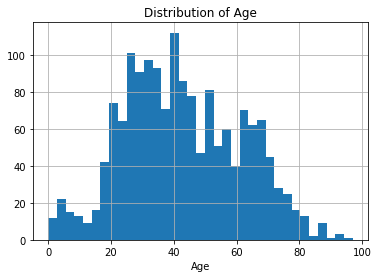

In [17]:
#What about age?
df_soc.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age')

Text(0.5, 0, 'Tenure')

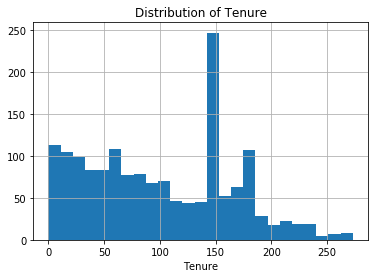

In [18]:
#What about Tenure?
df_soc.hist('Tenure', bins=25);
plt.title('Distribution of Tenure');
plt.xlabel('Tenure')

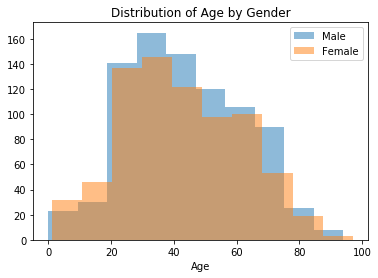

In [19]:
plt.hist('Age', data=df_soc[df_soc['Sex'] == 'M'], alpha=0.5, label='Male');
plt.hist('Age', data=df_soc[df_soc['Sex'] == 'F'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

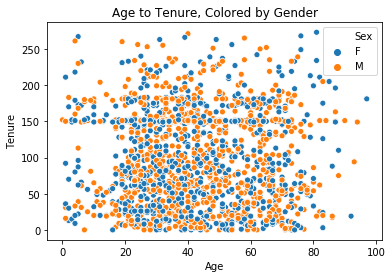

In [20]:
# Tenure de 150 months sont le plus fréquent chez un client au sein de cette banque 
sns.scatterplot('Age', 'Tenure', hue='Sex', data=df_soc);
plt.title('Age to Tenure, Colored by Gender');

Text(0.5, 1.0, 'Product Analysis')

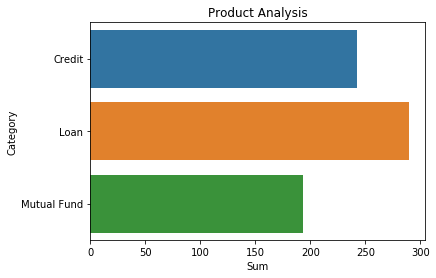

In [21]:
product_analysis = pd.DataFrame({'Category': {0: 'Credit', 1: 'Loan',2:'Mutual Fund'}, 'Sum': {0: float(df_sales[["Sale_CC"]].sum()),
1:float(df_sales[["Sale_CL"]].sum()),2:float(df_sales[["Sale_MF"]].sum()) }})
sns.barplot(x='Sum',y='Category',data=product_analysis)
plt.title("Product Analysis")

# Feature Engineering

In [29]:
# This table gives us a clear on different types of clients : 
#1.Those who have one current account or multiple CA
#2.Among who have saving intent, they have saving account, or moreover 
#3.They have investing intent 
df_product['Count_CA'] = df_product['Count_CA'].astype('category')
df_prsoduct['Count_SA'] = df_product['Count_SA'].astype('category')
dfs_product['Count_MF'] = df_product['Count_MF'].astype('category')
df_product['Count_OVD'] = df_product['Count_OVD'].astype('category')
df_product['Count_CC'] = df_product['Count_CC'].astype('category')
df_product['Count_CL'] = df_product['Count_CL'].astype('category')

In [30]:
### 100 of the most profitable clients within this bank from a revenue per sales point of view 

df_sales['Sale_MF'] = df_sales['Sale_MF'].astype('int')
df_sales['Sale_CC'] = df_sales['Sale_CC'].astype('int')
df_sales['Sale_CL'] = df_sales['Sale_CL'].astype('int')
df_sales['Total_Revenue']=df_sales['Revenue_MF']+df_sales['Revenue_CC']+df_sales['Revenue_CL']
df_sales['Total_Sales']=df_sales['Sale_MF']+df_sales['Sale_CC']+df_sales['Sale_CL']
df_sales=df_sales.sort_values('Total_Revenue', ascending = False)
df_sales['Revpersale']=df_sales['Total_Revenue']/df_sales['Total_Sales']
df_sales.loc[:, (df_sales != 0).any(axis=0)]
df_sales=df_sales.dropna()#569 client left
df_sales
###
df_soc_Revpersale= pd.merge(df_soc,df_sales, on='Client', how='inner')
df_soc_Revpersale=df_soc_Revpersale.sort_values('Revpersale', ascending = False)
df_train_rev=df_soc_Revpersale.head(100)

## Final Classification Prediction

In [9]:
# Get the 40% of missing data from df_soc
df_40=pd.merge(df_soc, df_inoutflow, on='Client', how='left')
df_40_1=pd.merge(df_40, df_product, on='Client', how='left')
df_40_1['Sex']=df_40_1['Sex'].replace({'M':'0','F':'1'})
df_40_1 = df_40_1[['Client','VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder','TransactionsDeb','TransactionsDeb_CA','TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder','Age','Tenure']]
#df_train_MF=df_train_MF.dropna()
df_40_2=pd.concat([df_40_1, df_sales])
df_40_f=df_40_2.drop_duplicates(subset='Client', keep=False)
#df_40_f=df_40_f.loc[:,['Client']]
#df_40_f=df_40_f.drop(['Sale_MF','Client','Age','Tenure','Revenue_CC','Revenue_CL','Revenue_MF','Sale_CC','Sale_CL'],axis=1)
#df_40_f=df_40_f.drop(['Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'],axis=1)

df_40_f=df_40_f.loc[:,['Sex','ActBal_CC','Count_MF','TransactionsDebCashless_Card','TransactionsDeb','TransactionsCred_CA',
                               'TransactionsCred','TransactionsDeb_CA','ActBal_SA','Count_CL','ActBal_CL']]
df_40_f=df_40_f.replace({np.NaN:0})
df_40_f


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Sex,ActBal_CC,Count_MF,TransactionsDebCashless_Card,TransactionsDeb,TransactionsCred_CA,TransactionsCred,TransactionsDeb_CA,ActBal_SA,Count_CL,ActBal_CL
0,0.0,0.0,0.0,0.0,8.0,3.0,4.0,7.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,13.0,6.0,8.0,10.0,0.0,0.0,0.0
9,0.0,0.0,0.0,3.0,10.0,2.0,2.0,10.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0
13,0.0,0.0,0.0,10.0,17.0,2.0,2.0,17.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1598,0.0,0.0,0.0,0.0,9.0,5.0,7.0,5.0,0.0,0.0,0.0
1600,0.0,0.0,0.0,0.0,3.0,2.0,2.0,3.0,0.0,0.0,0.0
1608,0.0,0.0,0.0,3.0,12.0,3.0,3.0,12.0,0.0,0.0,0.0
1610,0.0,0.0,0.0,1.0,12.0,3.0,3.0,12.0,0.0,0.0,0.0


In [15]:
Prediction=clff.predict(df_40_f)
Sales_MF_Prediction=pd.DataFrame(Prediction)
Sales_MF_Prediction=Sales_MF_Prediction.rename(columns={0:'Sales_MF_Prediction'})
Sales_MF_Prediction['Sales_MF_Prediction'].value_counts()
#Sales_MF_Prediction_final=pd.merge(df_40_f,Sales_MF_Prediction,right_index=True,left_index=True,how='left')
#Sales_MF_Prediction_final['Sales_MF_Prediction'].value_counts()

#Prediction.shape

0    629
1     17
Name: Sales_MF_Prediction, dtype: int64

In [54]:
Sales_MF_Prediction_final=pd.merge(df_40_f,Sales_MF_Prediction,right_index=True,left_index=True,how='right')
spf=pd.merge(Sales_MF_Prediction_final, df_soc,right_index=True,left_index=True,how='left')
spf=spf[['Client','Sales_MF_Prediction']]
spf=spf[spf.Sales_MF_Prediction!=0]
spf.to_pickle('spf.pickle')

In [55]:
spf

,Client,Sales_MF_Prediction
46,285,1
81,1545,1
89,703,1
170,1195,1
269,1074,1
296,680,1
311,735,1
318,1503,1
332,1095,1
362,830,1
